**Análisis númerico 2024-1.**

---



**Grupo 1:**

*   Jhon Fredy Aguirre García.
*   Alejandra Castaño Morales.



In [ ]:
# Librerias necesarias:
from math import exp # Usar la función exponencial.
import matplotlib.pyplot as plt # Hacer las graficas del inciso computacional.
import numpy as np # Hacer una partición de un intervalo.

# Punto 9 (Parte computacional):

Considere el problema de valor de contorno :

> **(P):** $-y''(t)+y(t)e^{y(t)}=1$ Con $0<t<1$, $y(0)=0$, $y(1)=-1$

Al cual se le pretende aplicar el método de disparo.

**a)** Grafique la función $\psi(s):= z(1; s) − 0, s\in[−6, 1]$. Recordar que $z(t; s)$ es la solución del
PVI asociado a (P), considerando $z'(0; s) = s$ en vez de $y(1) = 0$. ¿Se puede decir algo sobre la unicidad de la solución de (P)?

**b)** Aplique el método de disparo para determinar la(s) solucion(es) de (P). Dejar expresado
el(los) esquema(s) a resolver, e implementarlo(s). Debe resolver la ecuación no lineal por
método de:

* La secante, con tolerancia $10^{−10}$. Indicar número de iteraciones requeridas.
* Newton-Raphson, con tolerancia $10^{−10}$. Indicar número de iteraciones requeridas.

Finalmente, muestre cada solución aproximada en una misma gráfica. Puede usar la función
**ode45** de *Matlab*, si lo estima conveniente.

Definamos primero los datos que necesitamos durante la solución al PVF:

Como $y(0)=0$, $y(1)=-1$ y $0<t<1$ tenemos que:

> $a=0$, $b=1$.

> $\alpha=0$, $\beta=0$.

Reestructuremos así nuestro PVF a un PVI, donde:

> $y''(t)=y(t)e^{y(t)}-1$ Con $0<t<1$, $y(0)=0$, $y'(0)=s\in\mathbb{R}$.

Como $s$ es un escalar arbitrario necesitamos estimarlo, teniendo presente que $y(1,s)=-1$ donde $y(t,s)$ es la solución del sistema. Definamos así la función:

> $F(s)=y(1,s)+1\Longrightarrow F'(s)=\dfrac{\partial}{\partial s}y(1,s)$.

Para la cual debemos estimar la raíz, que es donde se cumple la igualdad anterior, para esto definamos:

> $z(t,s)=\dfrac{\partial}{\partial s}y(t,s)$.

Haciendo cortas operaciones llegamos a que:

> $z'(t,s)=\dfrac{\partial}{\partial s}y'(t,s)$.

> $z''(t,s)=\dfrac{\partial}{\partial s}y''(t,s)=\dfrac{\partial}{\partial s}[y(t)e^{y(t)}-1]$.

Además $z(a)=0$ y $z'(a)=1$.

Tomando $x_1=y,x_2=z,x_3=y',x_4=z'$ tenemos:

> $x_1(a)=0,x_2(a)=0,x_3(a)=s,x_4(a)=1$.

Por tanto, aplicando el método de Euler a las anteriores funciones:

> $x_{1,j+1}=x_{1,j}+f_1(t_j,x_{1,j})$.

> $x_{1,j+1}=x_{2,j}+f_2(t_j,x_{2,j})$.

> $x_{3,j+1}=x_{3,j}+f_3(t_j,x_{3,j})$.

> $x_{4,j+1}=x_{4,j}+f_4(t_j,x_{4,j})$.

Donde:

> $f_1(t,x_1)=x'_1=x_3$.

> $f_2(t,x_{2})=z'=x_4$.

> $f_3(t,x_{3})=y''=y(t)e^{y(t)}-1=x_1e^{x_1}-1$.

> $f_4(t_j,x_{4,j})=[e^{x_1}+x_1e^{x_1}]x_2$.

In [ ]:
# Definimos las variables:
a = 0
b = 1
alp = 0
bet = -1

# Definimos las funciones:
def f1(x1_j,x2_j,x3_j,x4_j):
  return x3_j

def f2(x1_j,x2_j,x3_j,x4_j):
  return x4_j

def f3(x1_j,x2_j,x3_j,x4_j):
  return x1_j*exp(x1_j)-1

def f4(x1_j,x2_j,x3_j,x4_j):
  return (exp(x1_j)+exp(x1_j)*x1_j)*x2_j

# Definimos la cantidad y ancho de las particiones:
N = 100
h = (b-a)/N

# Tolerancia:
tol = 10**(-10)

**a)** Realizaremos el proceso propuesto anteriormente para diferentes valores de $s\in[-6,1]$, guardando el valor de $F(s)=y(1,s)-0$ para finalmente realizar la grafica de este.

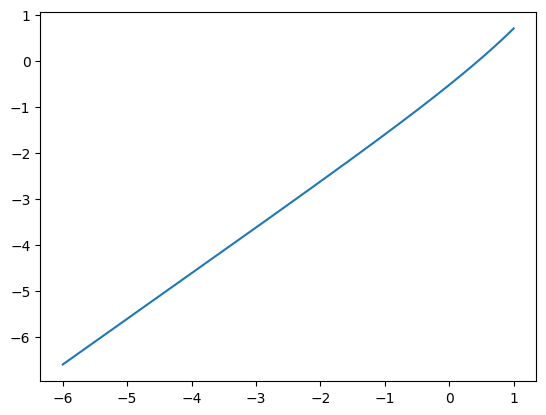

In [ ]:
# Creamos las listas:
VecS=list(np.linspace(-6,1,1000))
VecPsi=[]

# Para cada valor de s iteramos y calculamos la solución de la ecuación diferencial:
for s in VecS:
  # Inicializamos variables
  x1=[0]
  x2=[0]
  x3=[s]
  x4=[1]
  t=[a+h*j for j in range(N+1)]
  # Iteramos:
  for j in range(N):
    x1_sig = x1[j] + h * f1(x1[j],x2[j],x3[j],x4[j])
    x2_sig = x2[j] + h * f2(x1[j],x2[j],x3[j],x4[j])
    x3_sig = x3[j] + h * f3(x1[j],x2[j],x3[j],x4[j])
    x4_sig = x4[j] + h * f4(x1[j],x2[j],x3[j],x4[j])

    x1.append(x1_sig)
    x2.append(x2_sig)
    x3.append(x3_sig)
    x4.append(x4_sig)
  # Guardamos valores:
  VecPsi.append(x1[-1]-0)
# Graficamos:
plt.plot(VecS,VecPsi)
plt.show()

Como vemos, la gráfica muestra posibles soluciones no triviales $y(t)\neq0$, por lo tanto el sistema tiene única solución.

**b)** Aplicaremos el método de Newton Raphson para estimar el valor de $s$:

> $s_{r+1}=s_r-\frac{F(s_r)}{F'(s_r)}$.

Donde $s_0=\frac{b-a}{\beta-\alpha}$.

Ahora bien, aplicando el método de la secante:

> $s_{r+1}=s_r-\frac{F(s_r)[s_{r-1}-s_r]}{F(s_{r-1})-F(s_r)}$.

Donde, al necesitar dos valores iniciales:

> $s_0=\frac{b-a}{\beta-\alpha}$.

> $s_1=2s_0$.

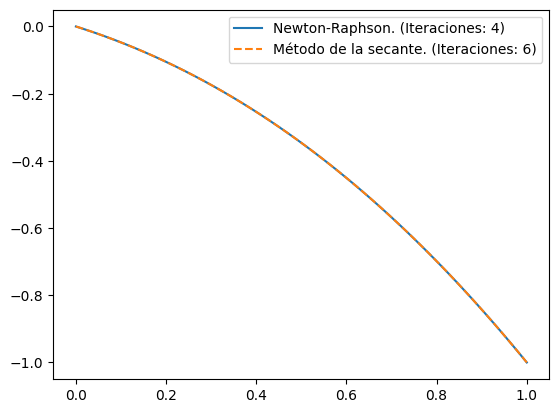

In [ ]:
# Método Newton Raphson.
# Inicializamos el valor inicial de s
s_0 = (b-a)/(bet-alp)
S=[s_0]
error=float("inf") # Aplicamos un error muy grande.

# Conteo de iteraciones.
iterNR=0
iterSec=0

# Aplicamos el método recalculando s hasta que el error sea el deseado:
while error>tol:
  # Inicializamos variables.
  x1=[0]
  x2=[0]
  x3=[S[-1]]
  x4=[1]
  t=[a+h*j for j in range(N+1)]
  # Iteramos.
  for j in range(N):
    x1_sig = x1[j] + h * f1(x1[j],x2[j],x3[j],x4[j])
    x2_sig = x2[j] + h * f2(x1[j],x2[j],x3[j],x4[j])
    x3_sig = x3[j] + h * f3(x1[j],x2[j],x3[j],x4[j])
    x4_sig = x4[j] + h * f4(x1[j],x2[j],x3[j],x4[j])

    x1.append(x1_sig)
    x2.append(x2_sig)
    x3.append(x3_sig)
    x4.append(x4_sig)
  #Guardamos valores y recalculamos s.
  F_k = x1[-1]-bet
  F_k_der = x2[-1]

  s_j = S[-1] - (F_k/F_k_der)
  S.append(s_j)

  iterNR+=1
  error = abs(S[-1]-S[-2])

# Graficamos
plt.plot(t,x1)

# Realizamos el mismo proceso para el método de la secante:
s_0 = (b-a)/(bet-alp)
S=[s_0]
error=float("inf")
s_1 = 2 * s_0
F_k = []

while error>tol:

  x1=[0]
  x2=[0]
  x3=[S[-1]]
  x4=[1]
  t=[a+h*j for j in range(N+1)]

  for j in range(N):
    x1_sig = x1[j] + h * f1(x1[j],x2[j],x3[j],x4[j])
    x2_sig = x2[j] + h * f2(x1[j],x2[j],x3[j],x4[j])
    x3_sig = x3[j] + h * f3(x1[j],x2[j],x3[j],x4[j])
    x4_sig = x4[j] + h * f4(x1[j],x2[j],x3[j],x4[j])

    x1.append(x1_sig)
    x2.append(x2_sig)
    x3.append(x3_sig)
    x4.append(x4_sig)

  F_k.append(x1[-1]-bet)
  if len(S)<2:
    s_j = 2 * S[-1]
  else:
    s_j = S[-1] - ((S[-1]-S[-2])/(F_k[-1]-F_k[-2])) * F_k[-1]
  S.append(s_j)

  error = abs(S[-1]-S[-2])
  iterSec+=1

# Mostramos la grafica:
plt.plot(t,x1,"--")
plt.legend([f"Newton-Raphson. (Iteraciones: {iterNR})",f"Método de la secante. (Iteraciones: {iterSec})"])
plt.show()